In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

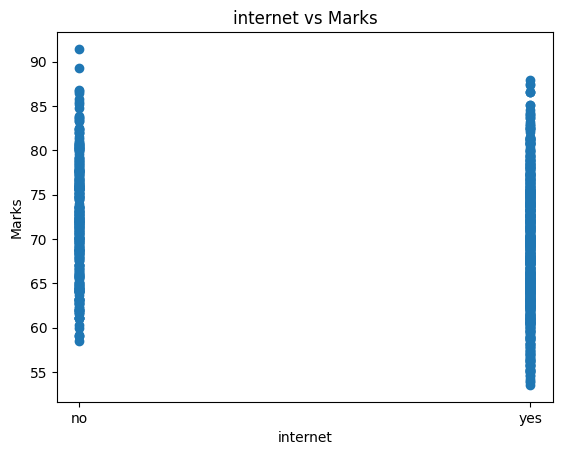

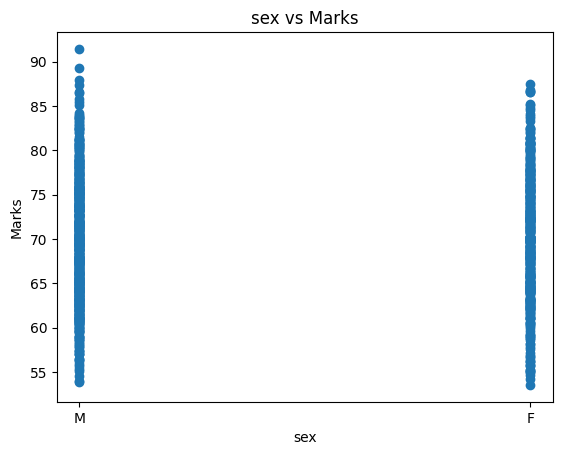

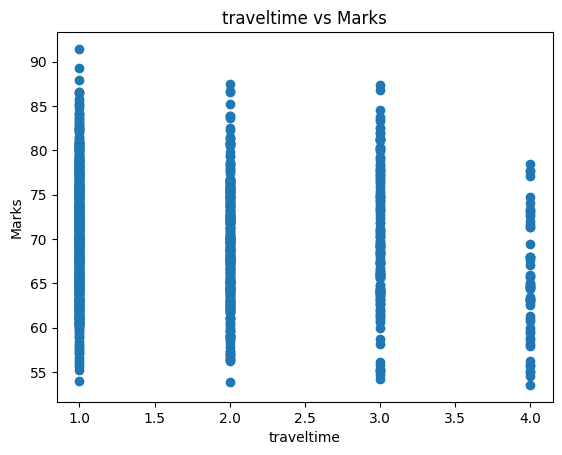

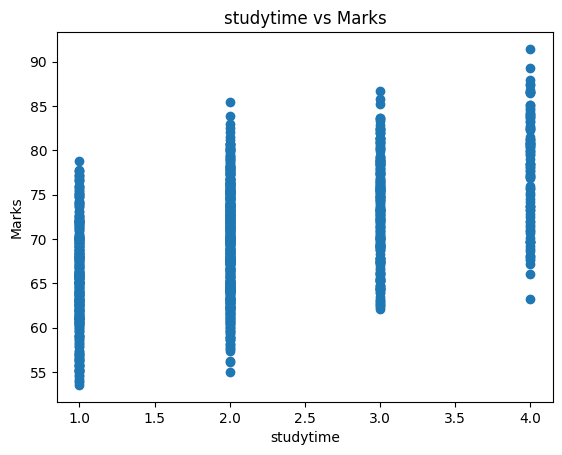

In [ ]:
# Use the file namd 'training data' to train the model

file_path = "E:\\Learners Space\\Intro to ML\\Week 1\\Linear Reg\\Training data.xlsx"

data = pd.read_excel(file_path)
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# Visualizing each feature against the target variable
features = data.columns[:-1]  # All columns except the last one (marks)
for i, feature in enumerate(features):
    plt.scatter(x_train[:, i], y_train)
    plt.xlabel(feature)
    plt.ylabel('Marks')
    plt.title(f'{feature} vs Marks')
    plt.show()

# To get an idea whether to add some features or not
# Add some features if required in x_train
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    le_internet = LabelEncoder()
    le_sex = LabelEncoder()
    le_age = LabelEncoder()

    x_train[:, 0] = le_internet.fit_transform(x_train[:, 0])  # internet
    x_train[:, 1] = le_sex.fit_transform(x_train[:, 1])      # sex
    x_train[:, 6] = le_age.fit_transform(x_train[:, 6])      # age

    study_freetime_ratio = x_train[:, 3] / (x_train[:, 4] + 1)
    x_train = np.hstack((x_train, study_freetime_ratio.reshape(-1, 1)))
    
    return x_train

x_train = feature_changing(x_train)

In [24]:
def z_score(x_train):

    x_mean = np.mean(x_train, axis=0)
    x_std = np.std(x_train, axis=0)
    
    # Applying Z-score normalization
    x_train = (x_train - x_mean) / x_std
    
    return x_train,x_std,x_mean

In [25]:
def cost(x_train, y_train, w, b):
    m = x_train.shape[0]  # number of training examples
    y_pred = np.dot(x_train, w) + b  # predicted values
    loss = (1 / (2 * m)) * np.sum((y_train - y_pred) ** 2)  # mean squared error
    return loss

In [26]:
def gradient_descent(x_train, y_train, w, b, learning_rate=0.01, epochs=1000):
    m = x_train.shape[0]  # number of training examples

    for epoch in range(epochs):
        y_pred = np.dot(x_train, w) + b
        error = y_pred - y_train

        # Computing gradients
        dw = (1 / m) * np.dot(x_train.T, error)
        db = (1 / m) * np.sum(error)

        # Updating weights and bias
        w = w - learning_rate * dw
        b = b - learning_rate * db

    return w, b


In [27]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel("E:\\Learners Space\\Intro to ML\\Week 1\\Linear Reg\\Test data.xlsx").iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel("E:\\Learners Space\\Intro to ML\\Week 1\\Linear Reg\\Test data.xlsx").iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
